# DSA 2040 Practical Exam - Section 2, Task 2
## Clustering Analysis - Customer Segmentation

**Student:** Monaheng218  
**Date:** August 13, 2025  
**Total Marks:** 15

### Task Requirements:
1. Apply K-means clustering to customer data
2. Determine optimal number of clusters
3. Analyze and interpret customer segments
4. Visualize clustering results
5. Provide business insights and recommendations

In [1]:
# =============================================================================
# IMPORTS AND SETUP
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Clustering libraries imported successfully")
print("📊 Ready for customer segmentation analysis")

✅ Clustering libraries imported successfully
📊 Ready for customer segmentation analysis


In [ ]:
# =============================================================================
# LOAD PREPROCESSED DATA
# =============================================================================

print("\n" + "="*60)
print("STEP 1: LOADING PREPROCESSED DATA")
print("="*60)

# Load the preprocessed clustering dataset
df_clustering_full = pd.read_csv('clustering_dataset_full.csv')
X_clustering = pd.read_csv('clustering_dataset.csv')

print(f" Clustering dataset loaded successfully")
print(f"Shape: {X_clustering.shape}")
print(f"Features: {list(X_clustering.columns)}")

print("\n Dataset Overview:")
print(X_clustering.describe())

print("\n Sample of preprocessed data:")
print(X_clustering.head(10))

# Check for any missing values
missing_values = X_clustering.isnull().sum().sum()
print(f"\n Missing values: {missing_values}")

if missing_values == 0:
    print(" Data is clean and ready for clustering")
else:
    print(" Handling missing values...")
    X_clustering = X_clustering.fillna(X_clustering.mean())
    print(" Missing values handled")


STEP 1: LOADING PREPROCESSED DATA
📊 Clustering dataset loaded successfully
Shape: (419, 9)
Features: ['TotalSpent', 'AvgTransactionValue', 'TransactionCount', 'TotalQuantity', 'ProductDiversity', 'MonthSpread', 'WeekendPreference', 'AvgPricePreference', 'Country_encoded']

📋 Dataset Overview:
         TotalSpent  AvgTransactionValue  TransactionCount  TotalQuantity  \
count  4.190000e+02         4.190000e+02      4.190000e+02   4.190000e+02   
mean   8.902982e-17         3.010056e-16     -8.902982e-17   7.949091e-17   
std    1.001195e+00         1.001195e+00      1.001195e+00   1.001195e+00   
min   -1.664717e+00        -2.648861e+00     -1.489907e+00  -1.573832e+00   
25%   -8.114292e-01        -5.270035e-01     -7.723541e-01  -7.789931e-01   
50%   -1.032360e-01        -9.642282e-02     -2.939855e-01  -1.524733e-01   
75%    7.260830e-01         4.132507e-01      6.627518e-01   6.984715e-01   
max    2.768535e+00         5.826037e+00      2.815411e+00   2.400361e+00   

       Prod


STEP 2: DETERMINING OPTIMAL NUMBER OF CLUSTERS

🔍 Method 1: Elbow Method (Within-Cluster Sum of Squares)


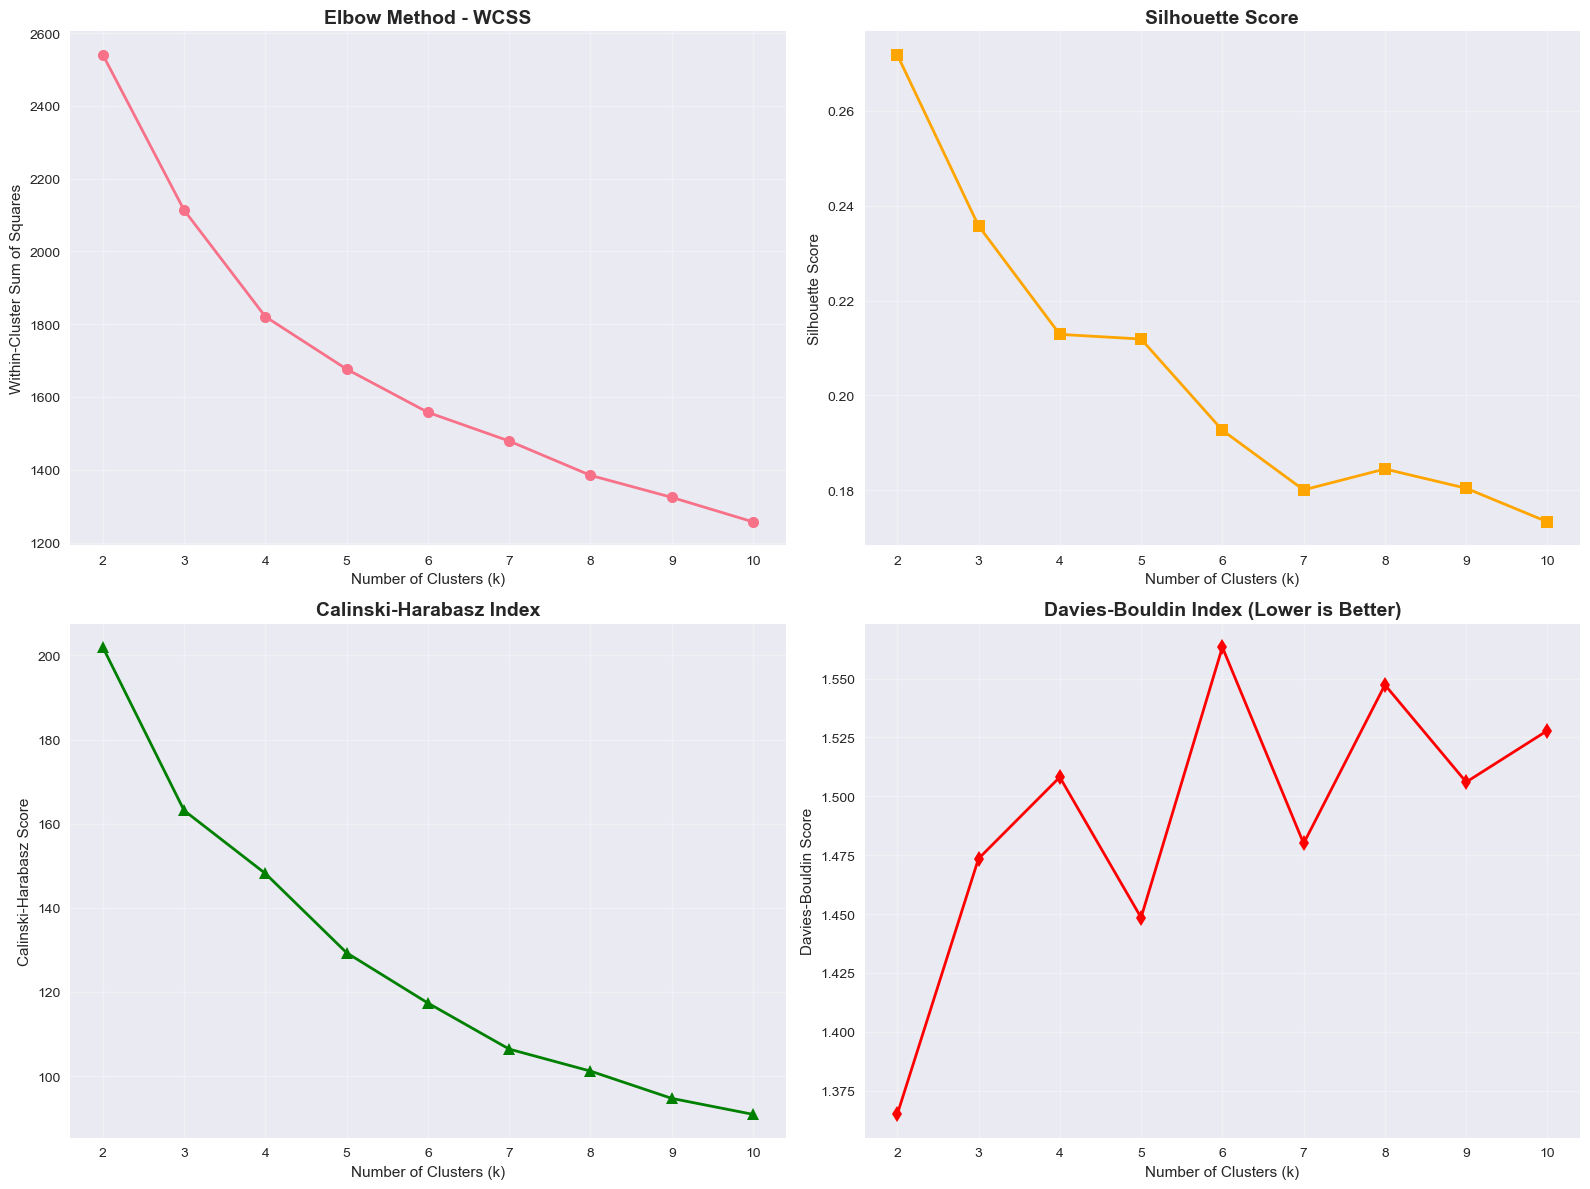


📊 Clustering Evaluation Metrics:
    k      WCSS  Silhouette  Calinski-Harabasz  Davies-Bouldin
0   2  2540.626       0.272            201.945           1.365
1   3  2113.425       0.236            163.136           1.474
2   4  1820.826       0.213            148.160           1.508
3   5  1676.435       0.212            129.315           1.449
4   6  1557.687       0.193            117.366           1.563
5   7  1478.899       0.180            106.424           1.480
6   8  1384.607       0.184            101.195           1.547
7   9  1324.103       0.180             94.708           1.506
8  10  1256.767       0.173             90.914           1.528

🎯 Optimal k recommendations:
   📈 Best Silhouette Score: k = 2 (score: 0.272)
   📈 Best Calinski-Harabasz: k = 2 (score: 201.9)
   📉 Best Davies-Bouldin: k = 2 (score: 1.365)

🔧 Selected optimal k = 2 based on silhouette analysis


In [ ]:
# =============================================================================
# OPTIMAL NUMBER OF CLUSTERS DETERMINATION
# =============================================================================

print("\n" + "="*60)
print("STEP 2: DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("="*60)

# Method 1: Elbow Method
print("\n🔍 Method 1: Elbow Method (Within-Cluster Sum of Squares)")

k_range = range(2, 11)
wcss = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_clustering)
    
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clustering, cluster_labels))
    calinski_scores.append(calinski_harabasz_score(X_clustering, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_clustering, cluster_labels))

# Plot evaluation metrics
plt.figure(figsize=(16, 12))

# Elbow Method
plt.subplot(2, 2, 1)
plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method - WCSS', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True, alpha=0.3)

# Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette_scores, marker='s', color='orange', linewidth=2, markersize=8)
plt.title('Silhouette Score', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)

# Calinski-Harabasz Index
plt.subplot(2, 2, 3)
plt.plot(k_range, calinski_scores, marker='^', color='green', linewidth=2, markersize=8)
plt.title('Calinski-Harabasz Index', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True, alpha=0.3)

# Davies-Bouldin Index (lower is better)
plt.subplot(2, 2, 4)
plt.plot(k_range, davies_bouldin_scores, marker='d', color='red', linewidth=2, markersize=8)
plt.title('Davies-Bouldin Index (Lower is Better)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print evaluation metrics
print("\n Clustering Evaluation Metrics:")
metrics_df = pd.DataFrame({
    'k': k_range,
    'WCSS': wcss,
    'Silhouette': silhouette_scores,
    'Calinski-Harabasz': calinski_scores,
    'Davies-Bouldin': davies_bouldin_scores
})
print(metrics_df.round(3))

# Find optimal k based on different methods
best_silhouette_k = k_range[np.argmax(silhouette_scores)]
best_calinski_k = k_range[np.argmax(calinski_scores)]
best_davies_k = k_range[np.argmin(davies_bouldin_scores)]

print(f"\n Optimal k recommendations:")
print(f"    Best Silhouette Score: k = {best_silhouette_k} (score: {max(silhouette_scores):.3f})")
print(f"    Best Calinski-Harabasz: k = {best_calinski_k} (score: {max(calinski_scores):.1f})")
print(f"    Best Davies-Bouldin: k = {best_davies_k} (score: {min(davies_bouldin_scores):.3f})")

# Choose optimal k (most common recommendation or best silhouette)
optimal_k = best_silhouette_k
print(f"\n🔧 Selected optimal k = {optimal_k} based on silhouette analysis")


STEP 3: APPLYING K-MEANS CLUSTERING

🔧 Applying K-means clustering with k = 2

📊 Final Clustering Performance:
   • Silhouette Score: 0.272
   • Calinski-Harabasz Index: 201.9
   • Davies-Bouldin Index: 1.365
   • Within-Cluster Sum of Squares: 2540.6

📊 Cluster Distribution:
   Cluster 0: 205 customers (48.9%)
   Cluster 1: 214 customers (51.1%)


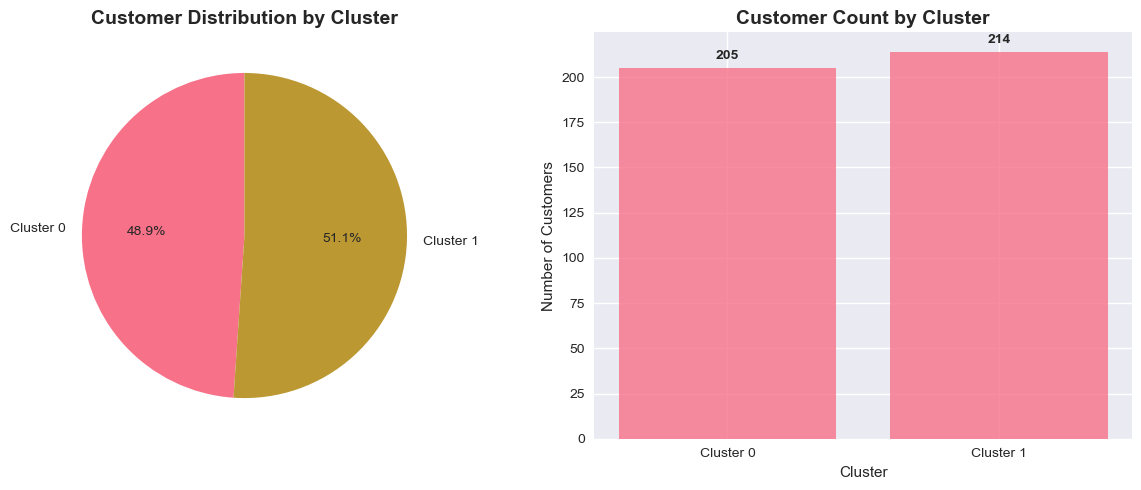

✅ K-means clustering completed successfully


In [ ]:
# =============================================================================
# APPLY K-MEANS CLUSTERING
# =============================================================================

print("\n" + "="*60)
print("STEP 3: APPLYING K-MEANS CLUSTERING")
print("="*60)

# Apply K-means with optimal k
print(f"\n🔧 Applying K-means clustering with k = {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_clustering)

# Add cluster labels to the full dataset
df_clustering_full['Cluster'] = cluster_labels
X_clustering['Cluster'] = cluster_labels

# Calculate final clustering metrics
final_silhouette = silhouette_score(X_clustering.drop('Cluster', axis=1), cluster_labels)
final_calinski = calinski_harabasz_score(X_clustering.drop('Cluster', axis=1), cluster_labels)
final_davies = davies_bouldin_score(X_clustering.drop('Cluster', axis=1), cluster_labels)

print(f"\n Final Clustering Performance:")
print(f"   • Silhouette Score: {final_silhouette:.3f}")
print(f"   • Calinski-Harabasz Index: {final_calinski:.1f}")
print(f"   • Davies-Bouldin Index: {final_davies:.3f}")
print(f"   • Within-Cluster Sum of Squares: {kmeans_final.inertia_:.1f}")

# Cluster distribution
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\n Cluster Distribution:")
for i, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"   Cluster {i}: {count} customers ({percentage:.1f}%)")

# Visualize cluster distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(cluster_counts.values, labels=[f'Cluster {i}' for i in cluster_counts.index], 
        autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Cluster', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
plt.bar([f'Cluster {i}' for i in cluster_counts.index], cluster_counts.values, alpha=0.8)
plt.title('Customer Count by Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(" K-means clustering completed successfully")


STEP 4: CLUSTER ANALYSIS AND INTERPRETATION

📊 Cluster Characteristics Analysis:
         TotalSpent_mean  TotalSpent_median  TotalSpent_std  \
Cluster                                                       
0                3193.08            3125.30         1016.01   
1                1164.76            1084.25          697.52   

         AvgTransactionValue_mean  AvgTransactionValue_median  \
Cluster                                                         
0                          312.70                      300.15   
1                          288.98                      275.48   

         TransactionCount_mean  TransactionCount_median  TotalQuantity_mean  \
Cluster                                                                       
0                        10.56                     10.0              260.23   
1                         4.04                      4.0               93.95   

         TotalQuantity_median  ProductDiversity_mean  ProductDiversity_median  \
Cluste

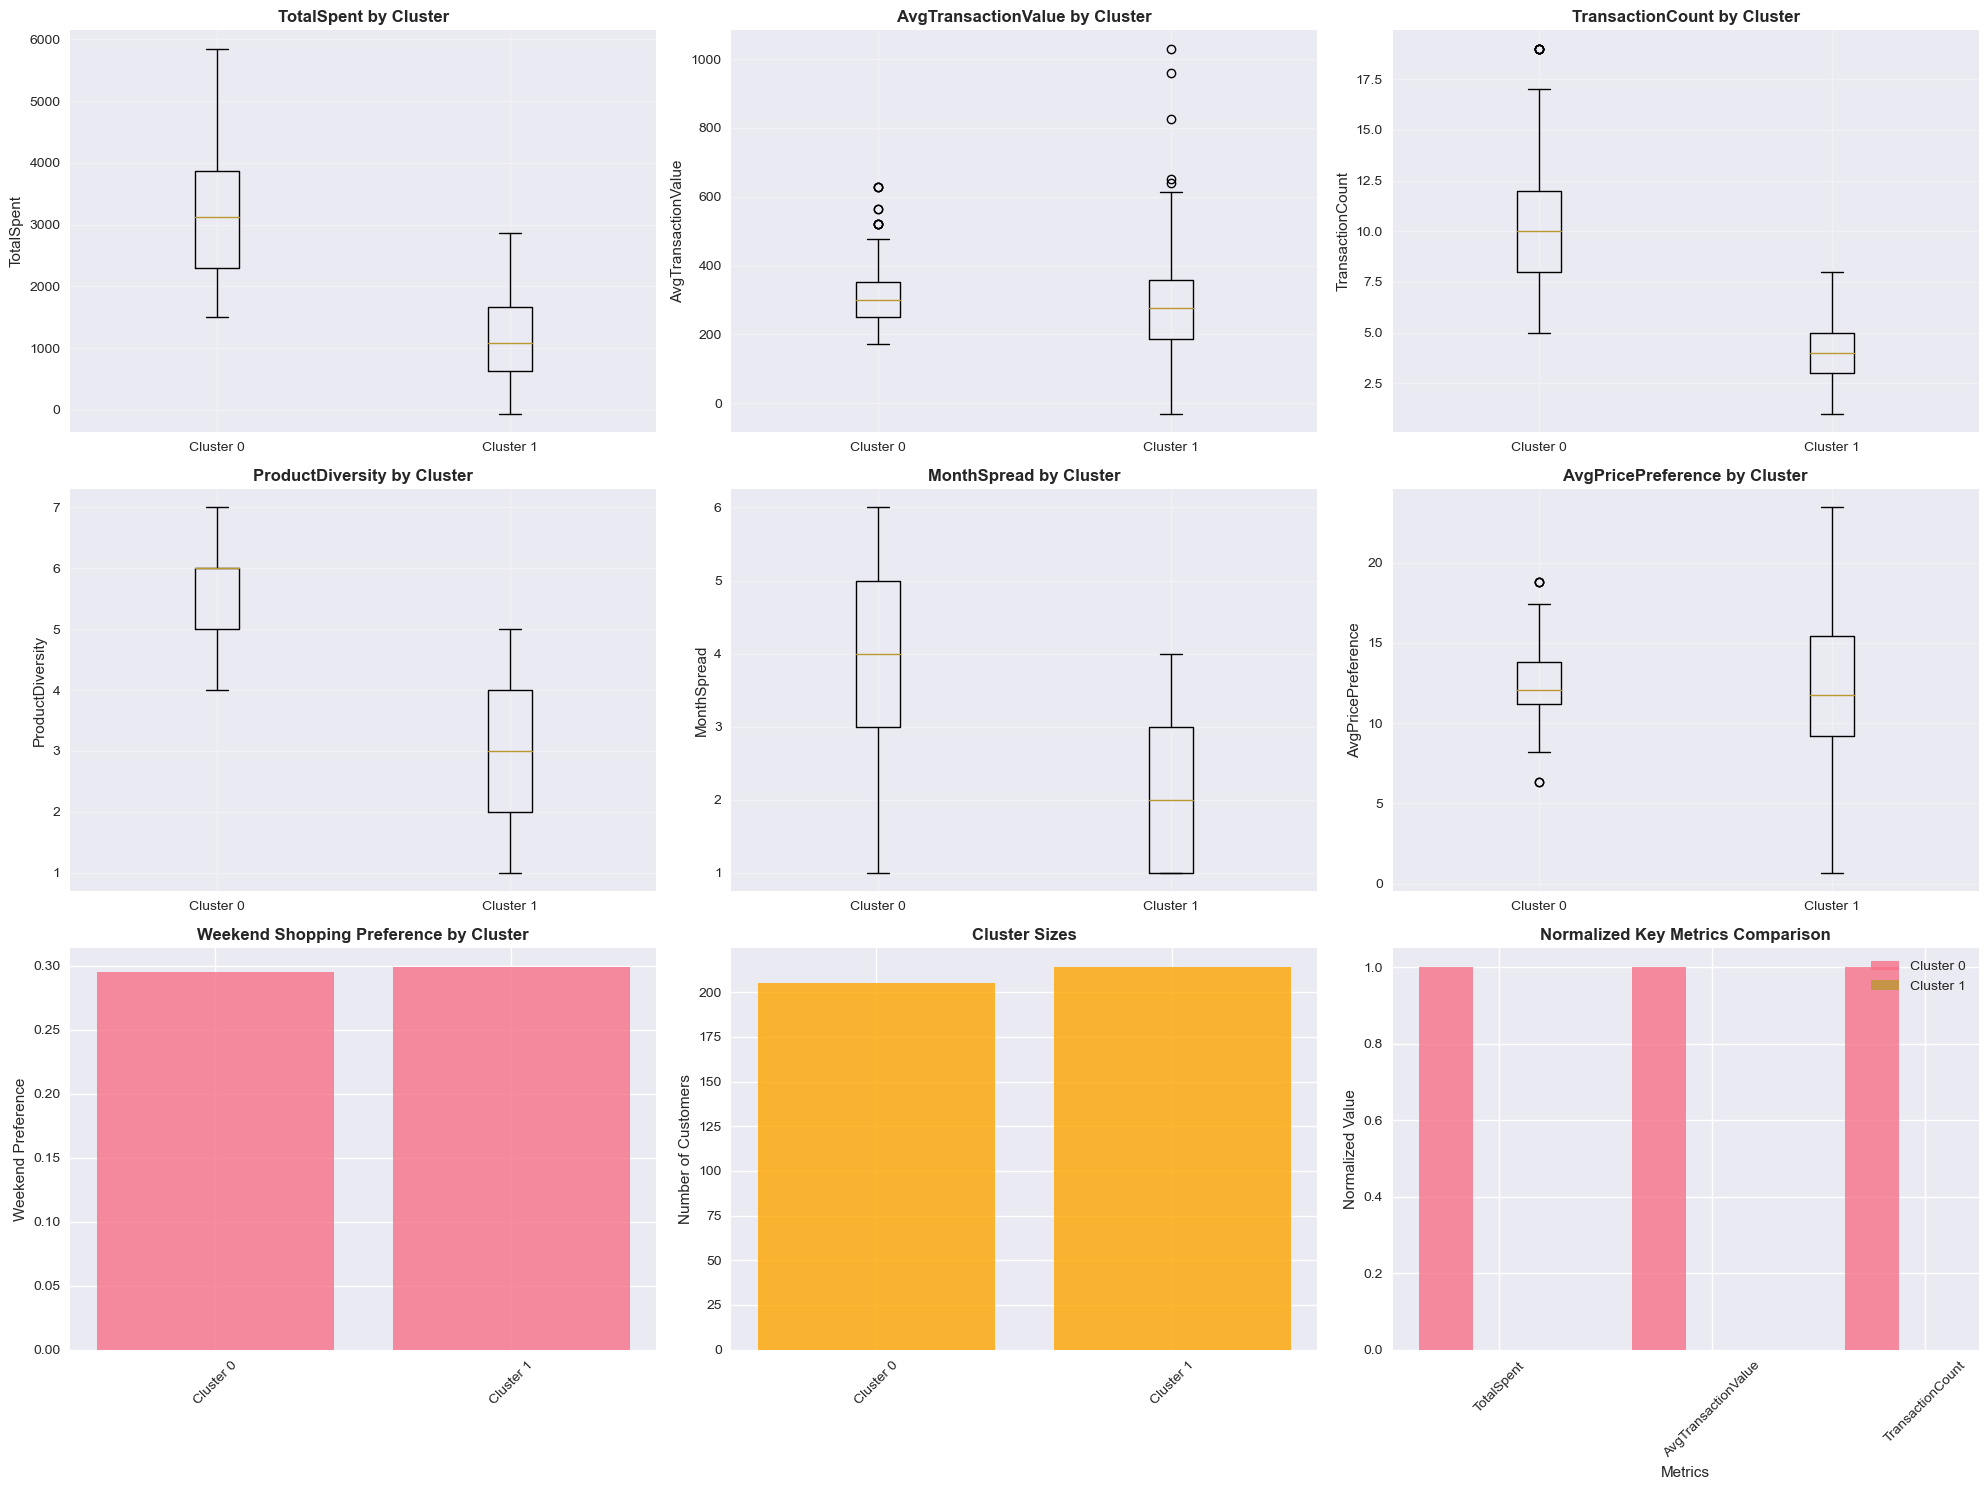

In [ ]:
# =============================================================================
# CLUSTER ANALYSIS AND INTERPRETATION
# =============================================================================

print("\n" + "="*60)
print("STEP 4: CLUSTER ANALYSIS AND INTERPRETATION")
print("="*60)

# Analyze cluster characteristics
print("\n Cluster Characteristics Analysis:")

# Statistical summary by cluster
cluster_summary = df_clustering_full.groupby('Cluster').agg({
    'TotalSpent': ['mean', 'median', 'std'],
    'AvgTransactionValue': ['mean', 'median'],
    'TransactionCount': ['mean', 'median'],
    'TotalQuantity': ['mean', 'median'],
    'ProductDiversity': ['mean', 'median'],
    'MonthSpread': ['mean', 'median'],
    'WeekendPreference': ['mean'],
    'AvgPricePreference': ['mean', 'median']
}).round(2)

# Flatten column names
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns]
print(cluster_summary)

# Cluster profiles
print("\n Detailed Cluster Profiles:")
for cluster_id in sorted(df_clustering_full['Cluster'].unique()):
    cluster_data = df_clustering_full[df_clustering_full['Cluster'] == cluster_id]
    
    print(f"\n🔹 CLUSTER {cluster_id} ({len(cluster_data)} customers):")
    print(f"    Average Total Spent: ${cluster_data['TotalSpent'].mean():.2f}")
    print(f"    Average Transaction Value: ${cluster_data['AvgTransactionValue'].mean():.2f}")
    print(f"    Average Transaction Count: {cluster_data['TransactionCount'].mean():.1f}")
    print(f"    Average Total Quantity: {cluster_data['TotalQuantity'].mean():.1f}")
    print(f"    Average Product Diversity: {cluster_data['ProductDiversity'].mean():.1f} categories")
    print(f"    Average Month Spread: {cluster_data['MonthSpread'].mean():.1f} months")
    print(f"    Weekend Shopping Preference: {cluster_data['WeekendPreference'].mean():.1%}")
    print(f"    Average Price Preference: ${cluster_data['AvgPricePreference'].mean():.2f}")
    
    # Top countries in this cluster
    top_countries = cluster_data['Country'].value_counts().head(3)
    print(f"    Top Countries: {', '.join([f'{country} ({count})' for country, count in top_countries.items()])}")

# Visualize cluster characteristics
plt.figure(figsize=(20, 15))

# Key metrics comparison
key_metrics = ['TotalSpent', 'AvgTransactionValue', 'TransactionCount', 
              'ProductDiversity', 'MonthSpread', 'AvgPricePreference']

for i, metric in enumerate(key_metrics, 1):
    plt.subplot(3, 3, i)
    
    # Box plot for each cluster
    cluster_data_list = [df_clustering_full[df_clustering_full['Cluster'] == cluster][metric] 
                        for cluster in sorted(df_clustering_full['Cluster'].unique())]
    
    plt.boxplot(cluster_data_list, labels=[f'Cluster {i}' for i in sorted(df_clustering_full['Cluster'].unique())])
    plt.title(f'{metric} by Cluster', fontsize=12, fontweight='bold')
    plt.ylabel(metric)
    plt.grid(True, alpha=0.3)

# Weekend preference by cluster
plt.subplot(3, 3, 7)
weekend_pref = df_clustering_full.groupby('Cluster')['WeekendPreference'].mean()
plt.bar([f'Cluster {i}' for i in weekend_pref.index], weekend_pref.values, alpha=0.8)
plt.title('Weekend Shopping Preference by Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Weekend Preference')
plt.xticks(rotation=45)

# Cluster size comparison
plt.subplot(3, 3, 8)
cluster_sizes = df_clustering_full['Cluster'].value_counts().sort_index()
plt.bar([f'Cluster {i}' for i in cluster_sizes.index], cluster_sizes.values, alpha=0.8, color='orange')
plt.title('Cluster Sizes', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Average metrics radar chart preparation
plt.subplot(3, 3, 9)
cluster_means = df_clustering_full.groupby('Cluster')[['TotalSpent', 'AvgTransactionValue', 'TransactionCount']].mean()
cluster_means_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

x = np.arange(len(cluster_means_norm.columns))
width = 0.25
for i, cluster in enumerate(cluster_means_norm.index):
    plt.bar(x + i * width, cluster_means_norm.loc[cluster], width, label=f'Cluster {cluster}', alpha=0.8)

plt.title('Normalized Key Metrics Comparison', fontsize=12, fontweight='bold')
plt.xlabel('Metrics')
plt.ylabel('Normalized Value')
plt.xticks(x + width, cluster_means_norm.columns, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


STEP 5: CLUSTER VISUALIZATION

🔍 Creating PCA visualization...
🔍 Creating t-SNE visualization...


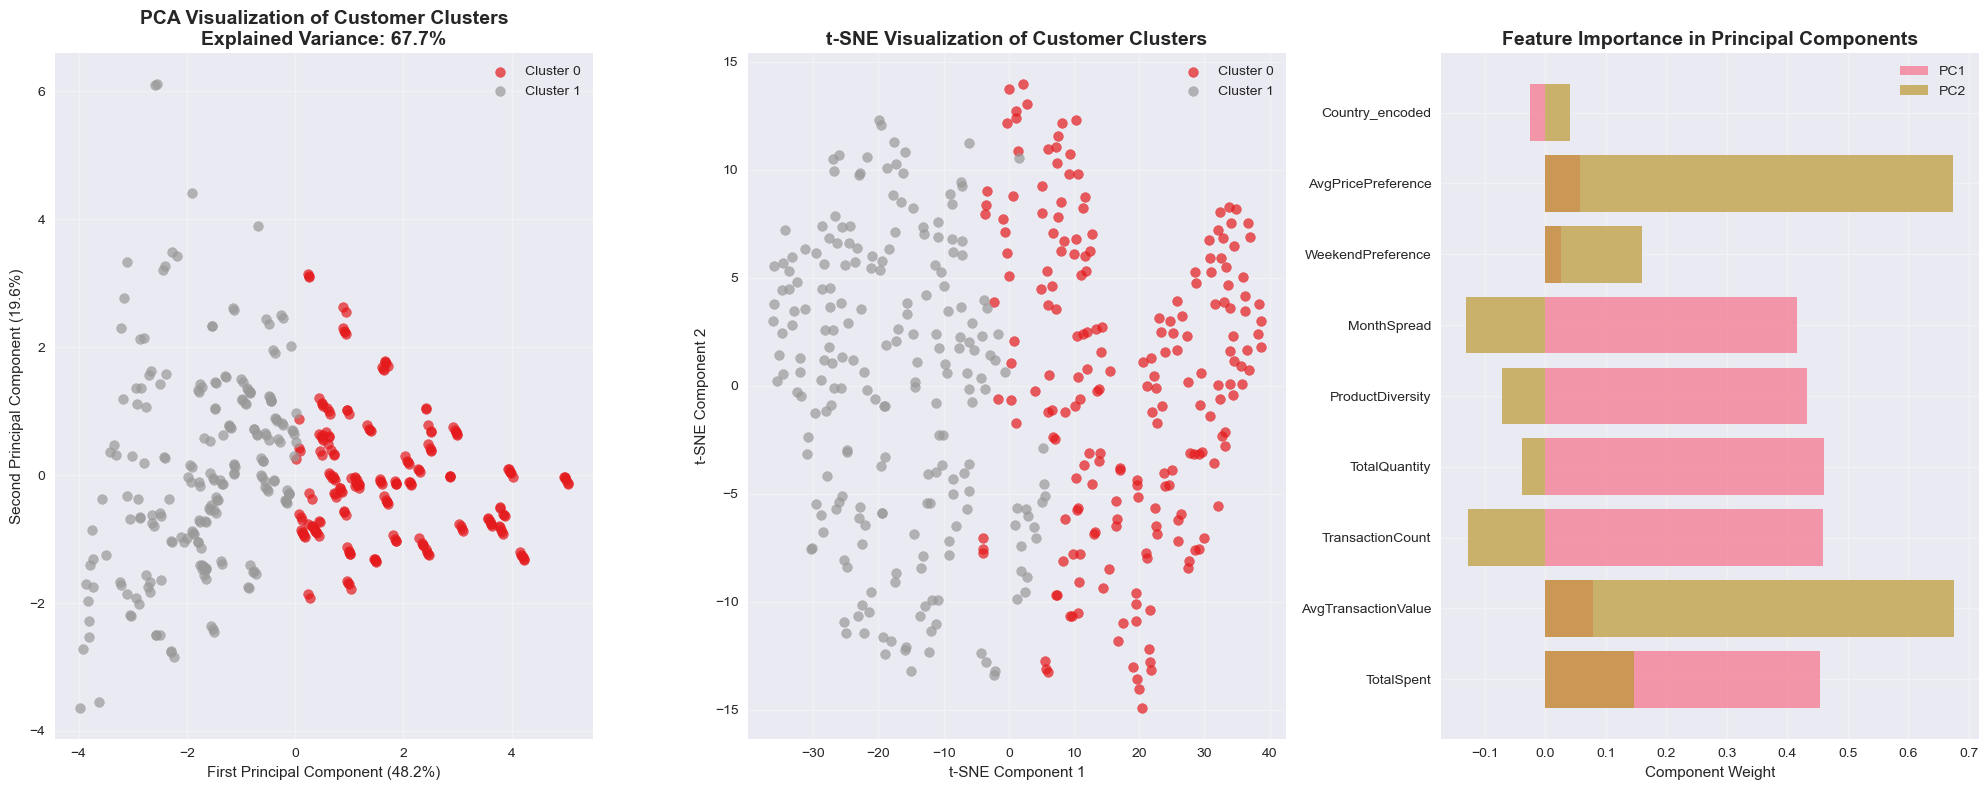


📊 PCA Analysis:
   • PC1 explains 48.2% of variance
   • PC2 explains 19.6% of variance
   • Total explained variance: 67.7%

🔍 Most important features for clustering:
   • AvgTransactionValue: PC1=0.079, PC2=0.676
   • AvgPricePreference: PC1=0.057, PC2=0.673
   • TotalSpent: PC1=0.454, PC2=0.147
   • TransactionCount: PC1=0.459, PC2=-0.128
   • MonthSpread: PC1=0.416, PC2=-0.131


In [ ]:
# =============================================================================
# CLUSTER VISUALIZATION
# =============================================================================

print("\n" + "="*60)
print("STEP 5: CLUSTER VISUALIZATION")
print("="*60)

# Prepare data for visualization (remove cluster column for PCA)
X_viz = X_clustering.drop('Cluster', axis=1)

# Method 1: PCA Visualization
print("\n🔍 Creating PCA visualization...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_viz)

# Method 2: t-SNE Visualization
print("🔍 Creating t-SNE visualization...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_viz)

# Create visualization
plt.figure(figsize=(20, 8))

# PCA Plot
plt.subplot(1, 3, 1)
colors = plt.cm.Set1(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    mask = cluster_labels == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[colors[i]], 
               label=f'Cluster {i}', alpha=0.7, s=50)

plt.title(f'PCA Visualization of Customer Clusters\nExplained Variance: {pca.explained_variance_ratio_.sum():.1%}', 
          fontsize=14, fontweight='bold')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%})')
plt.legend()
plt.grid(True, alpha=0.3)

# t-SNE Plot
plt.subplot(1, 3, 2)
for i in range(optimal_k):
    mask = cluster_labels == i
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=[colors[i]], 
               label=f'Cluster {i}', alpha=0.7, s=50)

plt.title('t-SNE Visualization of Customer Clusters', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature importance in PCA
plt.subplot(1, 3, 3)
feature_importance = pd.DataFrame({
    'Feature': X_viz.columns,
    'PC1': pca.components_[0],
    'PC2': pca.components_[1]
})

plt.barh(feature_importance['Feature'], feature_importance['PC1'], alpha=0.7, label='PC1')
plt.barh(feature_importance['Feature'], feature_importance['PC2'], alpha=0.7, label='PC2')
plt.title('Feature Importance in Principal Components', fontsize=14, fontweight='bold')
plt.xlabel('Component Weight')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print PCA explained variance
print(f"\n PCA Analysis:")
print(f"   • PC1 explains {pca.explained_variance_ratio_[0]:.1%} of variance")
print(f"   • PC2 explains {pca.explained_variance_ratio_[1]:.1%} of variance")
print(f"   • Total explained variance: {pca.explained_variance_ratio_.sum():.1%}")

print(f"\n Most important features for clustering:")
feature_importance_total = np.abs(feature_importance[['PC1', 'PC2']]).sum(axis=1)
top_features = feature_importance.loc[feature_importance_total.nlargest(5).index]
for _, row in top_features.iterrows():
    print(f"   • {row['Feature']}: PC1={row['PC1']:.3f}, PC2={row['PC2']:.3f}")

In [ ]:
# =============================================================================
# BUSINESS INSIGHTS AND RECOMMENDATIONS
# =============================================================================

print("\n" + "="*70)
print("BUSINESS INSIGHTS AND CUSTOMER SEGMENTATION STRATEGY")
print("="*70)

# Generate cluster labels based on characteristics
cluster_profiles = {}
cluster_labels_business = {}

for cluster_id in sorted(df_clustering_full['Cluster'].unique()):
    cluster_data = df_clustering_full[df_clustering_full['Cluster'] == cluster_id]
    
    avg_spent = cluster_data['TotalSpent'].mean()
    avg_frequency = cluster_data['TransactionCount'].mean()
    avg_diversity = cluster_data['ProductDiversity'].mean()
    
    cluster_profiles[cluster_id] = {
        'avg_spent': avg_spent,
        'avg_frequency': avg_frequency,
        'avg_diversity': avg_diversity,
        'size': len(cluster_data)
    }
    
    # Assign business labels based on characteristics
    if avg_spent > df_clustering_full['TotalSpent'].quantile(0.75):
        if avg_frequency > df_clustering_full['TransactionCount'].quantile(0.75):
            cluster_labels_business[cluster_id] = "VIP Champions"
        else:
            cluster_labels_business[cluster_id] = "High-Value Customers"
    elif avg_spent > df_clustering_full['TotalSpent'].quantile(0.5):
        if avg_frequency > df_clustering_full['TransactionCount'].quantile(0.5):
            cluster_labels_business[cluster_id] = "Loyal Customers"
        else:
            cluster_labels_business[cluster_id] = "Potential Loyalists"
    else:
        if avg_frequency > df_clustering_full['TransactionCount'].quantile(0.5):
            cluster_labels_business[cluster_id] = "New Customers"
        else:
            cluster_labels_business[cluster_id] = "At Risk"

# Display business insights
print("\n CUSTOMER SEGMENT PROFILES:")
print("=" * 50)

for cluster_id in sorted(cluster_profiles.keys()):
    profile = cluster_profiles[cluster_id]
    business_label = cluster_labels_business[cluster_id]
    cluster_data = df_clustering_full[df_clustering_full['Cluster'] == cluster_id]
    
    print(f"\n🔸 CLUSTER {cluster_id}: {business_label}")
    print(f"    Size: {profile['size']} customers ({profile['size']/len(df_clustering_full)*100:.1f}%)")
    print(f"    Average Spending: ${profile['avg_spent']:.2f}")
    print(f"    Average Frequency: {profile['avg_frequency']:.1f} transactions")
    print(f"    Product Diversity: {profile['avg_diversity']:.1f} categories")
    print(f"    Top Countries: {', '.join(cluster_data['Country'].value_counts().head(3).index.tolist())}")
    
    # Revenue contribution
    cluster_revenue = cluster_data['TotalSpent'].sum()
    total_revenue = df_clustering_full['TotalSpent'].sum()
    revenue_contribution = (cluster_revenue / total_revenue) * 100
    print(f"    Revenue Contribution: {revenue_contribution:.1f}% of total")

# Strategic recommendations
print(f"\n STRATEGIC RECOMMENDATIONS:")
print("=" * 50)

recommendations = {
    "VIP Champions": [
        " Provide exclusive VIP treatment and early access to new products",
        " Offer personalized recommendations and premium customer service",
        " Create a loyalty program with exclusive benefits and rewards"
    ],
    "High-Value Customers": [
        " Encourage increased purchase frequency through targeted campaigns",
        " Cross-sell complementary products based on purchase history",
        " Upgrade to VIP status through engagement programs"
    ],
    "Loyal Customers": [
        " Maintain engagement through regular communication and offers",
        " Introduce bulk purchase incentives to increase order value",
        " Recognize loyalty with anniversary rewards and special discounts"
    ],
    "Potential Loyalists": [
        " Implement targeted email campaigns to increase engagement",
        " Offer first-time buyer discounts and welcome packages",
        "📱 Use mobile notifications for abandoned cart recovery"
    ],
    "New Customers": [
        " Focus on onboarding experience and customer education",
        " Provide incentives to increase order value and frequency",
        " Proactive customer service to address concerns early"
    ],
    "At Risk": [
        " Implement win-back campaigns with attractive offers",
        " Conduct customer feedback surveys to understand pain points",
        " Provide significant discounts to re-engage these customers"
    ]
}

for cluster_id in sorted(cluster_labels_business.keys()):
    business_label = cluster_labels_business[cluster_id]
    print(f"\n {business_label} (Cluster {cluster_id}):")
    for recommendation in recommendations.get(business_label, ["Custom strategy needed"]):
        print(f"   {recommendation}")

# Overall business impact
total_customers = len(df_clustering_full)
total_revenue = df_clustering_full['TotalSpent'].sum()
avg_customer_value = total_revenue / total_customers

print(f"\n OVERALL BUSINESS IMPACT:")
print("=" * 40)
print(f" Total Customers Segmented: {total_customers:,}")
print(f" Total Revenue: ${total_revenue:,.2f}")
print(f" Average Customer Value: ${avg_customer_value:.2f}")
print(f" Number of Segments: {optimal_k}")
print(f" Clustering Quality (Silhouette): {final_silhouette:.3f}")

# Save results
df_clustering_full['BusinessLabel'] = df_clustering_full['Cluster'].map(cluster_labels_business)
df_clustering_full.to_csv('customer_segments_final.csv', index=False)

print("\n Results saved to 'customer_segments_final.csv'")
print("\n" + "="*70)
print(" CUSTOMER SEGMENTATION ANALYSIS COMPLETED SUCCESSFULLY")
print("Customer segments identified and strategic recommendations provided")
print("="*70)


BUSINESS INSIGHTS AND CUSTOMER SEGMENTATION STRATEGY

🎯 CUSTOMER SEGMENT PROFILES:

🔸 CLUSTER 0: VIP Champions
   📊 Size: 205 customers (48.9%)
   💰 Average Spending: $3193.08
   🔄 Average Frequency: 10.6 transactions
   🎨 Product Diversity: 5.6 categories
   🌍 Top Countries: Germany, Lithuania, Italy
   💎 Revenue Contribution: 72.4% of total

🔸 CLUSTER 1: At Risk
   📊 Size: 214 customers (51.1%)
   💰 Average Spending: $1164.76
   🔄 Average Frequency: 4.0 transactions
   🎨 Product Diversity: 3.0 categories
   🌍 Top Countries: Iceland, Netherlands, Norway
   💎 Revenue Contribution: 27.6% of total

🚀 STRATEGIC RECOMMENDATIONS:

🎯 VIP Champions (Cluster 0):
   🏆 Provide exclusive VIP treatment and early access to new products
   🎁 Offer personalized recommendations and premium customer service
   💎 Create a loyalty program with exclusive benefits and rewards

🎯 At Risk (Cluster 1):
   🚨 Implement win-back campaigns with attractive offers
   📞 Conduct customer feedback surveys to understa